In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [2]:
url = 'http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html'

In [3]:
request = urlopen(url)

In [4]:
soup = BeautifulSoup(request.read(), 'lxml')

In [5]:
def get_research_papers(lista):
    string = []
    in_class = False
    for i in lista:
        if "Research papers:" in i:
            string.append(i)
            in_class = True
        elif "Research reports:" in i:
            return string
        if in_class:
            string.append(i)

In [6]:
lines = get_research_papers(soup.text.split('\n'))[3:]

In [7]:
prace = []
for i in range(len(lines)):
    if re.search(r'\s[(]199[0-9][)]\s|\s[(]20[0-2][0-9][)]\s', lines[i]) != None:
        prace.append(lines[i])     

In [8]:
len(prace)

552

In [9]:
articles = []
articles2 = []
for i in range(len(prace)):
    authors = prace[i].split('(')[0].split(',')
    authors = [author.replace(' ', '').replace(',', '') for author in authors]
    published = prace[i].split('(')[1][:4]
    title = prace[i].split('(', 1)[1][7:].replace('"', '').replace('\r', '')
    
    articles.append([authors, published, title])
    articles2.append([', '.join(authors), published, title])


In [10]:
len(articles)

552

In [11]:
articles[0]

[['M.Balcerek', 'K.Burnecki', 'G.Sikora', 'A.Wyłomańska'],
 '2021',
 'Discriminating Gaussian processes via quadratic form statistics, ']

In [12]:
df = pd.DataFrame(articles)

In [13]:
df.tail(80)

,0,1,2
472,"[S.Bovelli, D.Fioretto, A.Jurlewicz]",2001,Light scattering relaxation function of glass-...
473,"[K.Burnecki, J.Nowicka-Zagrajek]",2001,"Analiza umieralności,"
474,"[K.Burnecki, J.Nowicka-Zagrajek]",2001,Czy straty mają ogony... czyli rozkłady żądań ...
475,"[K.Burnecki, G.Kukla]",2001,"Instrumenty finansowe a ryzyko pogodowe,"
476,"[K.Burnecki, J.Nowicka-Zagrajek, A.Weron]",2001,Metoda pomiaru ryzyka (wartości zagrożonej - V...
...,...,...,...
547,"[Z.Michna, I.Rychlik]",1995,The expected number of level crossings for cer...
548,[A.Weron],1995,Computer aided modeling and simulation of elec...
549,"[A.Weron, R.Weron]",1995,Computer simulation of Levy stable variables a...
550,"[A.Weron, K.Weron, W.A.Woyczynski]",1995,"Relaxation function in dipolar materials,"


In [14]:
df2 = pd.DataFrame(articles2)

In [15]:
df2

,0,1,2
0,"M.Balcerek, K.Burnecki, G.Sikora, A.Wyłomańska",2021,Discriminating Gaussian processes via quadrati...
1,"Ł.Bielak, A.Grzesiek, J.Janczura, A.Wyłomańska",2021,Market risk factors analysis for an internatio...
2,"K.Burnecki, M.Teuerle, A.Wilkowska",2021,Ruin Probability for the Insurer–Reinsurer Mod...
3,"M.Gajowczyk, J.Szwabiński",2021,Detection of Anomalous Diffusion with Deep
4,"J.Gruszka, J.Szwabiński",2021,Advanced strategies of portfolio management
...,...,...,...
547,"Z.Michna, I.Rychlik",1995,The expected number of level crossings for cer...
548,A.Weron,1995,Computer aided modeling and simulation of elec...
549,"A.Weron, R.Weron",1995,Computer simulation of Levy stable variables a...
550,"A.Weron, K.Weron, W.A.Woyczynski",1995,"Relaxation function in dipolar materials,"


In [16]:
df1 = df.explode(0).reset_index(drop=True)

In [17]:
df1

,0,1,2
0,M.Balcerek,2021,Discriminating Gaussian processes via quadrati...
1,K.Burnecki,2021,Discriminating Gaussian processes via quadrati...
2,G.Sikora,2021,Discriminating Gaussian processes via quadrati...
3,A.Wyłomańska,2021,Discriminating Gaussian processes via quadrati...
4,Ł.Bielak,2021,Market risk factors analysis for an internatio...
...,...,...,...
1488,W.A.Woyczynski,1995,"Relaxation function in dipolar materials,"
1489,K.Weron,1995,Levy-stable and extreme value distributions in...
1490,K.Kosmulski,1995,Levy-stable and extreme value distributions in...
1491,A.Jurlewicz,1995,Levy-stable and extreme value distributions in...


In [18]:
df3 = df1.groupby([2]).count()

In [19]:
data = [b.string for b in soup.findAll('b')]

In [20]:
data = list(dict.fromkeys(data))

In [21]:
hsc = []
for i in range(len(df1)):
    if df1[0][i] in data:
        hsc.append(True)
    else:
        hsc.append(False)

In [22]:
df1['HSC'] = hsc

In [23]:
df1

,0,1,2,HSC
0,M.Balcerek,2021,Discriminating Gaussian processes via quadrati...,True
1,K.Burnecki,2021,Discriminating Gaussian processes via quadrati...,True
2,G.Sikora,2021,Discriminating Gaussian processes via quadrati...,True
3,A.Wyłomańska,2021,Discriminating Gaussian processes via quadrati...,True
4,Ł.Bielak,2021,Market risk factors analysis for an internatio...,True
...,...,...,...,...
1488,W.A.Woyczynski,1995,"Relaxation function in dipolar materials,",False
1489,K.Weron,1995,Levy-stable and extreme value distributions in...,False
1490,K.Kosmulski,1995,Levy-stable and extreme value distributions in...,False
1491,A.Jurlewicz,1995,Levy-stable and extreme value distributions in...,True


In [24]:
df11 = df1[df1['HSC'] == True].groupby(0).sum()

<AxesSubplot:xlabel='0'>

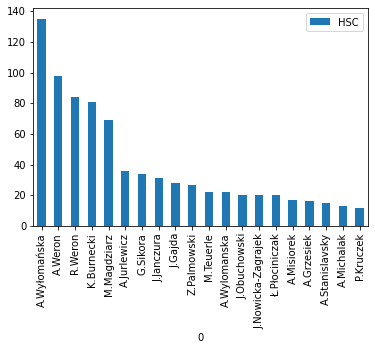

In [25]:
df11.sort_values(['HSC'], ascending=False)[0:20].plot.bar()

In [26]:
best_five = ['A.Wyłomańska', 'A.Weron', 'R.Weron', 'K.Burnecki', 'M.Magdziarz']
articles = []

In [27]:
articles

[]

In [28]:
for author in best_five:
    articles.append(df1[df1[0] == author]['HSC'].sum())

([<matplotlib.patches.Wedge at 0x1615757ce08>,
 [Text(0.676709200357039, 0.8672166154728224, 'A.Wyłomańska'),
  Text(-0.8649355112417793, 0.6796223667544515, 'A.Weron'),
  Text(-0.9329401000324884, -0.5827716274419774, 'R.Weron'),
  Text(0.10712828292951607, -1.0947709947731414, 'K.Burnecki'),
  Text(0.9836100717150876, -0.4924542890671582, 'M.Magdziarz')])

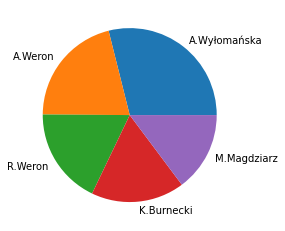

In [29]:
plt.pie(articles, labels=best_five)

In [30]:
labels = ['best five', 'others']
sizes = [sum(articles), len(df1)-sum(articles)]

([<matplotlib.patches.Wedge at 0x161575ddc48>,
 [Text(0.6102849722601036, 0.9151788091042563, 'best five'),
  Text(-0.6102848865748773, -0.9151788662432548, 'others')])

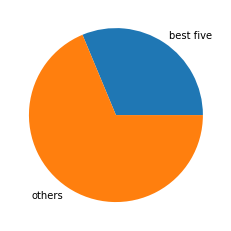

In [31]:
plt.pie(sizes, labels=labels)

In [32]:
df1.groupby([2]).last()

,0,1,HSC
2,,,
"A long term belt conveyor temperature data analysis - statistical tests for anomaly detection,",A.Wyłomańska,2020,True
"Identification of cyclic components in presence of non-Gaussian noise – application to crusher bearings damage detection,",R.Zimroz,2015,False
"Regime variance testing - a quantile approach,",A.Wyłomańska,2013,True
"Stochastic modeling of indoor air temperature,",A.Wyłomańska,2013,True
"Stochastic modeling of time series with application to local damage detection in rotating machinery,",R.Zimroz,2013,False
...,...,...,...
"Zarządzanie ryzykiem na rynku energii elektrycznej,",R.Weron,2000,True
"Zarządzanie ryzykiem na rynku energii,",R.Weron,2000,True
"Zastosowanie VaR na rynku energii,",P.Talar,2000,False


<AxesSubplot:xlabel='1'>

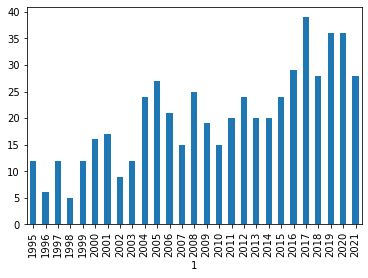

In [33]:
df1.groupby([2]).last().groupby(1).count()[0].plot.bar()

In [34]:
best_five = ['A.Wyłomańska', 'A.Weron', 'R.Weron', 'K.Burnecki', 'M.Magdziarz']

In [35]:
df1[1] = df1[1].astype(int)

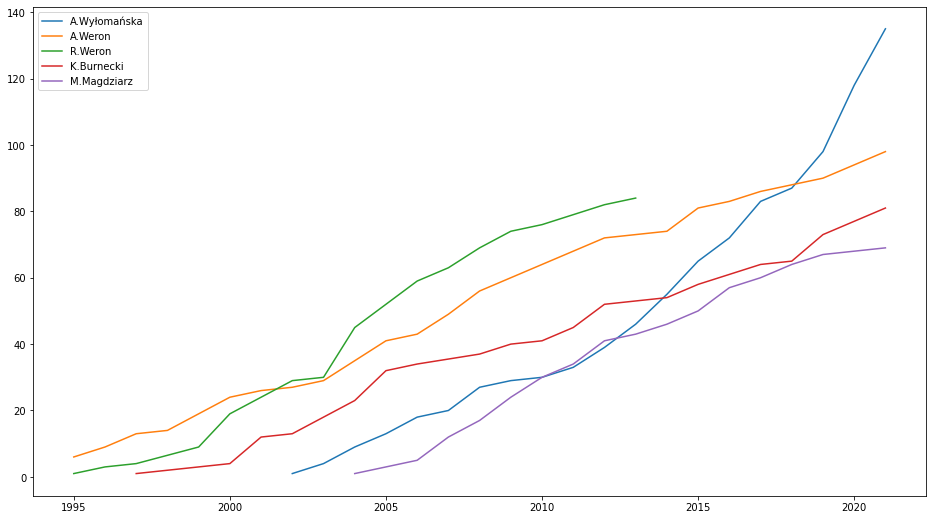

In [36]:
plt.figure(figsize=(16, 9))
for i in range(len(best_five)):
    x = df1[df1[0] == best_five[i]].groupby(1).sum().cumsum()
    plt.plot(x, label=best_five[i])
    plt.legend()

In [37]:
x = df1[df1[0] == best_five[2]].groupby(1).sum().cumsum()

In [38]:
val = x.to_dict()['HSC']

In [39]:
val

{1995: 1,
 1996: 3,
 1997: 4,
 1999: 9,
 2000: 19,
 2001: 24,
 2002: 29,
 2003: 30,
 2004: 45,
 2005: 52,
 2006: 59,
 2007: 63,
 2008: 69,
 2009: 74,
 2010: 76,
 2011: 79,
 2012: 82,
 2013: 84}

In [40]:
years = list(val.keys())

In [ ]:
while years[0] != 1995:
    years.insert(0, years[0]-1)
while years[-1] != 2021:
    years.insert(-1, years[-1]+1)
    print(years)

[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2013]
[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2014, 2013]
[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2014, 2014, 2013]
[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2014, 2014, 2014, 2013]
[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2014, 2014, 2014, 2014, 2013]
[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2014, 2014, 2014, 2014, 2014, 2013]
[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2013]
[1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 20

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df1.groupby([1, 0]).sum()

In [ ]:
df1